# CS410: Natural Language Processing, Fall 2023
## A3: Pretrained Language Models, Dan Jang - 11/12/2023

#### Description of Assignment

##### Introduction
Using the same training & testing datasets from our first & second assignments, in this assignment, *A3: Pretrained Language Models*, we will be exploring & comparing the performance of two, specific ***Pretrained Language Models*** (**PLMs**):

1. [***```BERT```***](https://arxiv.org/abs/1810.04805) (*Bidirectional Encoder Representations from Transformers*)

&

2. ***OpenAI***'s [***```GPT-2```***](https://paperswithcode.com/paper/language-models-are-unsupervised-multitask) (*Generative Pretrained Transformer 2*).

Like the previous two assignment, this assignment focuses on implementing a text-classification model that predicts sentiment & the same training/testing datasets, where in A3 specifically, the  (compared A2, where we used **pretrained embeddings** from the ```Word2Vec``` and ```GloVe``` **models**)

##### Data Preparation
Like our previous two assignments, we will use a pair of training & testing datasets containing product customer reviews, which is named the "Multilingual Amazon Reviews Corpus", in a ```.json``` container format, with several columns. The assignment will focus on a smaller subset of the original dataset, where we will focus on __two (2) columns__:
1. "review_title" - self-explanatory
2. "stars" - an integer, either 1 or 5, where the former indicates "negative" and 5 indicates "positive."

There will be a training set & a test set.

We will load the dataset using Python & use respective libraries to implement our text-classification model.

In contrary to the last two assignments, there will be no preprocessing done manually, except in using each *PLM*'s specific tokenizers to prepare our data for each run of our text-classification model implementations.

##### Pretrained Language Models (PLMs)
We will use [*HuggingFace*](https://huggingface.co/docs/hub/models-libraries) libraries (e.g. [```transformers```](https://huggingface.co/docs/transformers/index)) to access, then correspondingly experiment with the [***```BERT```***](https://arxiv.org/abs/1810.04805) and [***```GPT-2```***](https://paperswithcode.com/paper/language-models-are-unsupervised-multitask) __pretrained language models__ (***PLMs***), focusing on these aspects:
1. __Comparison__ of the two pretrained language models.
2. __Model Evaluation, Results, & Analysis__ (and comparison) of our two ***PLMs***.


##### Text Classification Model
To build our text-classification model, we will __follow these steps__:
1. Choosing between [***```BERT```***](https://arxiv.org/abs/1810.04805) and [***```GPT-2```***](https://paperswithcode.com/paper/language-models-are-unsupervised-multitask) ***pretrained language models*** (**PLMs**)
2. Using the specific tokenizer used for each respective ***PLM*** to prepare the training & testing text data.
3. Training of the text-classification model using the training dataset, "sentiment_train.json."
4. Evaluation of our text-classification model using the testing dataset, "sentiment_test.json."

##### Results & Analysis
A detailed analysis of the model's performance by comparing the results from the output of our two algorithms, where we will __include the following__:
1. *F1-score* or other relevant metrics.
2. Any challenges or limitations of the text-classification model/task.

***Additionally***, we will also try to provide a comparative analysis based on the results from our two previous assignments, our first assignment, *A1: Sentiment Analysis Text Classification* & from our second assignment, *A2: ```Word2Vec``` and ```GloVe``` Embeddings*.

Specifically, we recall from our previous two assignments, that we implemented text-classification models based on two suitable algorithms, and in the latter, implemented the usage of ```Word2Vec``` & ```GloVe``` pretrained embeddings to assist in our text-classification tasks.

#### Requirements


### Libraries & Constants Initialization

In [23]:
### 0.) Libraries
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModel
import json
import pandas
import huggingface-hub
import numpy as np
import matplotlib.pyplot as plot
import gensim.downloader

# Loading the pretrained models for le embeddings, using the gensim libra~ry!
print("Downloading / Loading the Word2Vec pretrained model through the gensim library...")
wordyvec = gensim.downloader.load('word2vec-google-news-300')
print("...the Word2Vec model has been downloaded / loaded!")

print("Downloading / Loading the GloVe pretrained model through the gensim library...")
glove = gensim.downloader.load('glove-wiki-gigaword-300')
print("...the GloVe model has been downloaded / loaded!")

print()
print("Downloading NLTK punkt, stopwords, & wordnet...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
print()
print("...done!")


...the Word2Vec model has been downloaded / loaded!
...the GloVe model has been downloaded / loaded!



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...



...done!


### [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) Visualization of the Word2Vec & GloVe Pretrained Model Embeddings

All words are present in the model!
All words are present in the model!
All words are present in the model!
All words are present in the model!


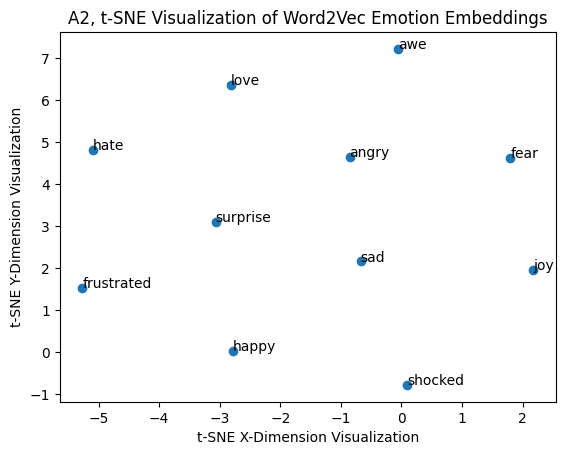

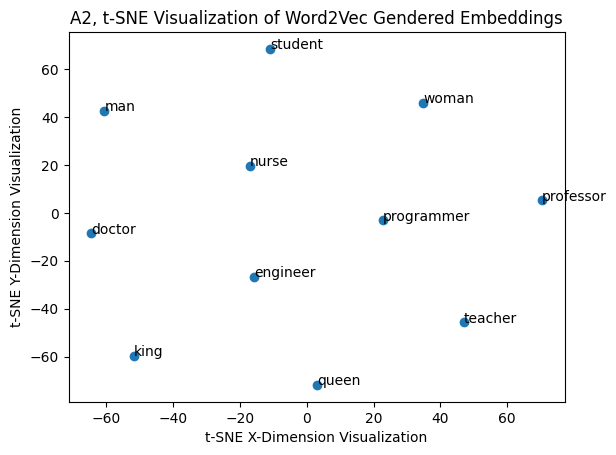

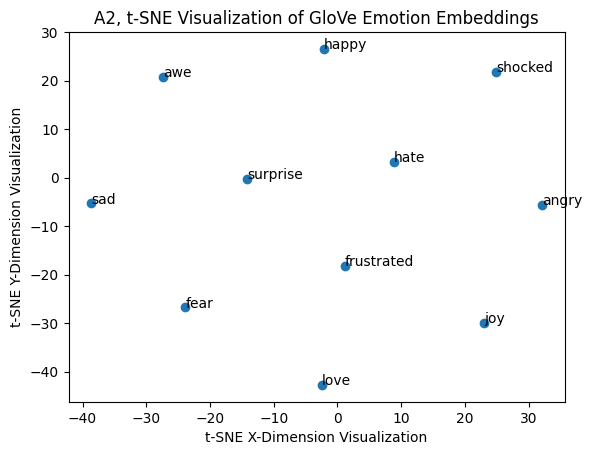

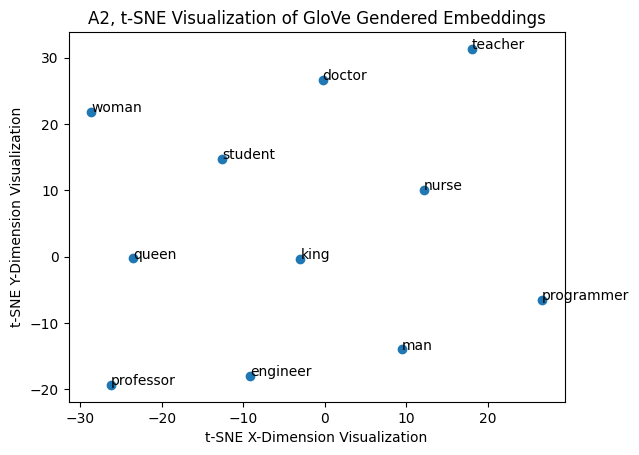

In [24]:
##### CS410: Natural Language Processing, Fall 2023 - 10/23/2023
##### A2: Word2Vec and GloVe Embeddings, Dan Jang - tSNE Visualization Implementation
#### Objective: Exploring Natural Language Processing (NLP), by building a text-classifier
#### for a text classification task, predicting whether a piece of text is "positive" or "negative."
#### ...with the inclusion of two (2) pretrained models, Word2Vec and GloVe, for word embeddings.

## For converting accuracy to percent
percentness = float(100)

## 1.0.) Constants, Variables, & Datasets

# trainfile = str(trainfile)
# testfile = str(testfile)
traindata = []
testdata = []

# 1.0.2.) Embedding Functions
def wordyvec_embedder(words):
    return np.array([wordyvec[word] for word in words])# if w in wordyvec else np.zeros(300))

def glove_embedder(words):
    return np.array([glove[word] for word in words])# if w in glove else np.zeros(300))
# def wordyvec_embedder(words, wordyvec=wordyvec):
#     beds = []
#     for w in words:
#         if w in wordyvec:
#             beds.append(wordyvec[w])
#         else:
#             beds.append(np.zeros(300))
#     return np.array(beds)
#     #return np.array([wordyvec[word] for word in wordlist])# if w in wordyvec else np.zeros(300))

# def glove_embedder(wordlist, glove=glove):
#     beds = []
#     for w in wordlist:
#         if w in glove:
#             beds.append(glove[w])
#         else:
#             beds.append(np.zeros(300))
#     return np.array(beds)
#     #return np.array([glove[word] for word in wordlist])# if w in glove else np.zeros(300))

def plotter(beds, wordlist, name):
    plot.scatter(beds[:,0], beds[:,1])
    plot.title(name)
    plot.xlabel('t-SNE X-Dimension Visualization')
    plot.ylabel('t-SNE Y-Dimension Visualization')
    for idx, w in enumerate(wordlist):
        plot.annotate(w, (beds[idx,0], beds[idx,1]))
    plot.show()
    

### Sanity Debug Data Check Function [Update: Fixed via dependency upgrade for threadpoolctl==3.1.0 or above, as credited below]
#### Super Special Credits to: https://stackoverflow.com/questions/73283082/t-sne-sklearn-attributeerror-nonetype-object-has-no-attribute-split
#### For saving me from hours of frustration & rewriting my code over and over
def verify_model(wordlist, model):
    missingwords = [w for w in wordlist if w not in model]
    if missingwords:
        print('The following words are missing from the model: {}'.format(missingwords))
    else:
        print('All words are present in the model!')

## 1.0.2.1.) Plotting the Word2Vec & GloVe Embeddings for Emotion & Gendered Words as t-SNE Visualizations!
def visualization():
    
    ## 1.0.1.) List of emotion & gendered words for use with tSNE visualization of embeddings
    emotion = ['happy', 'sad', 'angry', 'joy', 'love', 'fear', 'surprise', 'awe', 'frustrated', 'shocked', 'hate']
    gendered = ['woman', 'man', 'queen', 'king', 'doctor', 'nurse', 'engineer', 'professor', 'teacher', 'programmer', 'student']
    
    visualizer = TSNE(n_components=2, random_state=0, perplexity=10)
    
    ### Sanity Debug Check
    verify_model(emotion, wordyvec)
    verify_model(gendered, wordyvec)
    verify_model(emotion, glove)
    verify_model(gendered, glove)

    wordyvec_emotionization = visualizer.fit_transform(wordyvec_embedder(emotion))
    wordyvec_genderization = visualizer.fit_transform(wordyvec_embedder(gendered))

    glove_emotionization = visualizer.fit_transform(glove_embedder(emotion))
    glove_genderization = visualizer.fit_transform(glove_embedder(gendered))
    plotter(wordyvec_emotionization, emotion, 'A2, t-SNE Visualization of Word2Vec Emotion Embeddings')
    plotter(wordyvec_genderization, gendered, 'A2, t-SNE Visualization of Word2Vec Gendered Embeddings')
    plotter(glove_emotionization, emotion, 'A2, t-SNE Visualization of GloVe Emotion Embeddings')
    plotter(glove_genderization, gendered, 'A2, t-SNE Visualization of GloVe Gendered Embeddings')
    
visualization()

### Main Implementation: *Text Classification, with data-processed using respective tokenizers from & with Two (2) Pretrained Language Models*, [***```BERT```***](https://arxiv.org/abs/1810.04805) and [***```GPT-2```***](https://paperswithcode.com/paper/language-models-are-unsupervised-multitask).

In [26]:
##### CS410: Natural Language Processing, Fall 2023 - 11/13/2023
##### A3: Pretrained Language Models (PLMs), Dan Jang - Main Implementation
#### Objective: Exploring Natural Language Processing (NLP), by building a text-classifier
#### for a text classification task, predicting whether a piece of text is "positive" or "negative."
#### ...focusing on two (2) pretrained language models (PLMs),
#### ...BERT (Bidirectional Encoder Representations from Transformers) & OpenAI's GPT-2 (Generative Pretrained Transformer),
#### ...and using the respective toenizers to each PLM to perform the text-classification task as aforementioned

### 1.1.a) Logistic Regression algorithm using sklearn.linear_model.LogisticRegression
### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
### Returns four (4) thingys:
# I.) accuracy_score,
# II.) f1_score,
# III.) confusion_matrix,
# & IV.) classification_report.
def algo_two(xtrain, ytrain, xtest, ytest):
    lreg = LogisticRegression()
    
    lreg.fit(xtrain, ytrain)
    predictionresults = lreg.predict(xtest)
    
    return accuracy_score(ytest, predictionresults), f1_score(ytest, predictionresults), confusion_matrix(ytest, predictionresults), classification_report(ytest, predictionresults)

### A2-Specific: Helper functions for implementing the two pretrained models, Word2Vec & GloVe, for word embeddings.
def avgwordvec(words, model):
    wordlist = words.split()
    vecs = [model[w] for w in wordlist if w in model]
    if vecs:
        return sum(vecs) / len(vecs)
    else:
        return [0] * model.vector_size
    
def text2vectorizer(words, model):
    beds = [avgwordvec(w, model) for w in words]
    return beds

### A2-Specific: Preprocessing function for the text-reviews in the datasets using NLTK Tokenization, Stopwords & Lemmatization
def preprocess(txt):
    
    # Tokenization
    #print("Tokenizing the text-reviews in the datasets...")
    tokenz = word_tokenize(txt)
    #print("...Tokenization is complete!")
    
    # Stopwords
    #print("Removing stopwords from the tokenized text-reviews in the datasets...")
    stoppedwords = set(stopwords.words('english'))
    filteredwordsthatwerestopped = [w for w in tokenz if w.lower() not in stoppedwords]
    #print("...Stopwords have been removed!")
    
    # Lemmatization
    #print("Lemmatizing the text-reviews in the datasets...")
    lemmatization = WordNetLemmatizer()
    lemmatizedtokenz = [lemmatization.lemmatize(w) for w in filteredwordsthatwerestopped]
    #print("...Lemmatization is complete!")
    
    return ' '.join(lemmatizedtokenz)

def main(): #trainfile, testfile):
    print("Welcome, this is the main program for A2: Word2Vec and GloVe Embeddings.")
    print("Written by Dan J. for CS410: Natural Language Processing, Fall 2023.")
    print("\nWe will use one (1) classification algorithm:\n& 1. Logistic Regression + two (2) pretrained models for embeddings, Word2Vec & GloVe.\n...to create a text-classifier to guess negative or positive sentimentiality based on various text-reviews of products.")

    # # Loading the pretrained models for le embeddings, using the gensim library!
    # glove = gensim.downloader.load('glove-wiki-gigaword-300')
    # wordyvec = gensim.downloader.load('word2vec-google-news-300')
    
    # ## For converting accuracy to percent
    # percentness = float(100)
    
    # ## 1.0.) Constants, Variables, & Datasets
    
    # # trainfile = str(trainfile)
    # # testfile = str(testfile)
    # traindata = []
    # testdata = []
    
    # ## 1.0.1.) List of emotion & gendered words for use with tSNE visualization of embeddings
    # emotion = ['happy', 'sad', 'angry', 'joy', 'love', 'fear', 'surprise', 'awe', 'frustrated', 'shocked']
    # gendered = ['woman', 'man', 'queen', 'king', 'doctor', 'nurse', 'engineer', 'professor', 'teacher', 'technician', 'programmer']
    
    # 1.0.I.A) Debug Statements #1a for dataset loading times:
    print("\nLoading the training & testing datasets...")
    # with open(trainfile, "r") as trainfile:
    with open("sentiment_train.json", "r") as trainfile:
        #traindata = json.load(trainfile)
        for row in trainfile:
            traindata.append(json.loads(row))
        
    trainframe = pandas.DataFrame(traindata)
        
    # with open(testfile, "r") as testfile:
    with open("sentiment_test.json", "r") as testfile:
        #testdata = json.load(testfile)
        for row in testfile:
            testdata.append(json.loads(row))
        
    testframe = pandas.DataFrame(testdata)

    # 1.0.I.B) Debug Statements #1b for dataset loading times:
    print("Successfully loaded the training & testing datasets!\n")
    
    ## 1.0.1.) Initial Preprocessing of the training & testing data
    ## First, we isolate our two (2) columns, "review_title" & "stars."
    ## Second, we will convert values in the "stars" column so that 1 [negative] = 0 & 5 [positive] = 1.
    ## This will allow us to make the negative or positive sentiment a binary value-based thingy.
    trainframe = trainframe[['review_title', 'stars']]
    trainframe['stars'] = trainframe['stars'].apply(lambda x: 1 if x == 5 else 0)
    
    testframe = testframe[['review_title', 'stars']]
    testframe['stars'] = testframe['stars'].apply(lambda x: 1 if x == 5 else 0)
    

    ## 1.1.) A2-Specific Further Preprocessing of Data using NLTK Tokenization, Stopwords & Lemmatization
    
    print("Starting preprocessing of the training dataset...")
    trainframe['review_title'] = trainframe['review_title'].apply(preprocess)
    print("...Preprocessing of the training dataset is complete!")
    
    print("Starting preprocessing of the testing dataset...")
    testframe['review_title'] = testframe['review_title'].apply(preprocess)
    print("...Preprocessing of the testing dataset is complete!")
    
    # A2-Specific: 1.0.1.) Applying Word2Vec & GloVe Embeddings to vectorized data
    x2train = trainframe['review_title']
    x2test = testframe['review_title']
    
    print("Processing the training & testing datasets for Word2Vec...")
    x2train1 = text2vectorizer(x2train, wordyvec)
    x2test1 = text2vectorizer(x2test, wordyvec)
    print("Word2Vec has been applied to the training & testing datasets!")
    
    print("Processing the training & testing datasets for GloVe...")
    x2train2 = text2vectorizer(x2train, glove)
    x2test2 = text2vectorizer(x2test, glove)
    print("GloVe has been applied to the training & testing datasets!")
    
    ## Note: Below would have needed 31.9 GB of allocated RAM to run, which would crash my computer / take big bucks in Google Colab, heh.
    # # A2-Specific: 1.0.1.2.) Preprocessing Data for Word2Vec & GloVe Embeddings
    # print("Creating combined datasets to preprocess both Word2Vec & GloVe embeddings for the training & testing datasets...")
    # x2train2full = [list(a) + list(b) for a, b in zip(x2train1, x2train2)]
    # x2test2full = [list(a) + list(b) for a, b in zip(x2test1, x2train2)]
    # print("Combined datasets have been created!")
    
    # ## 1.0.1.) Applying NLTK Vader Sentiment
    # ## https://www.nltk.org/_modules/nltk/sentiment/vader.html
    # x2train = trainframe
    # x2train = x2train[['review_title', 'stars']]
    # # Have to truncate the training dataset so that it does not crash my computer, heh.
    # # Using a random_state seed of 2005, which was when Star Wars III was released (when Vader was technically introduced in the prequelz).
    # #x2train = x2train.sample(n=20000, random_state=2005)
    # print("Now applying NLTK Vader sentiment analysis to the training dataset...")
    # x2train['nltk_vader_sentiment'] = x2train['review_title'].apply(darth)
    # print("...Vader has been applied to the training set.")
    y2train = trainframe['stars']
    
    # x2test = testframe
    # x2test = x2test[['review_title', 'stars']]
    # print("Now applying NLTK Vader sentiment analysis to the testing dataset...")
    # x2test['nltk_vader_sentiment'] = x2test['review_title'].apply(darth)
    # print("...Vader has been applied to the testing set.")
    
    # ## 1.1.) Vectorization of the text-reviews in the datasets using sklearn.feature_extraction.text.CountVectorizer.
    # ## As a core component of text-classification, the vectorization process of the text-review data is essential for feature engineering in natural language processing.
    # ## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    # vectorization_machine_9000 = CountVectorizer()
    # xtrain = vectorization_machine_9000.fit_transform(trainframe['review_title'])
    # xtrain = xtrain.toarray()
    # ytrain = trainframe['stars']
    
    # xtest = vectorization_machine_9000.transform(testframe['review_title'])
    # xtest = xtest.toarray()

    
    ytest = testframe['stars']
    
    # ## 1.1.1.) Applying NLTK Vader Sentiment to vectorized data
    # x2traintext = vectorization_machine_9000.fit_transform(x2train['review_title'])
    # x2trainsentiment = x2train['nltk_vader_sentiment'].values.reshape(-1,1)
    # parsed_x2traintext = pandas.DataFrame(x2traintext.toarray())
    # parsed_x2trainsentiment = pandas.DataFrame(x2trainsentiment)
    
    # x2testtext = vectorization_machine_9000.transform(x2test['review_title'])
    # x2testsentiment = x2test['nltk_vader_sentiment'].values.reshape(-1,1)
    # parsed_x2testtext = pandas.DataFrame(x2testtext.toarray())
    # parsed_x2testsentiment = pandas.DataFrame(x2testsentiment)
    
    # x2train = pandas.concat([parsed_x2traintext, parsed_x2trainsentiment], axis=1)
    # x2test = pandas.concat([parsed_x2testtext, parsed_x2testsentiment], axis=1)


    ### 1.0.2b) Run Text-Classification Algorithms & Print the Model Results - with NLTK Vader sentiment analysis (& vectorization)
    print("-----\n")
    print("Running algorithm on le training & testing datasets (with pretrained model embeddings)...")

    
    print("Running Logistic Regression algorithm, version A (Word2Vec)...")
    bed1accuracy, bed1f1, bed1cmatrix, bed1creport = algo_two(x2train1, y2train, x2test1, ytest)
    print("..First embeddings are done!")
    
    print("Running Logistic Regression algorithm, version B (GloVe)...")
    bed2accuracy, bed2f1, bed2cmatrix, bed2creport = algo_two(x2train2, y2train, x2test2, ytest)
    print("..First embeddings are done!")
    
    print("...All Done!")
    print("-----\n")
    
    print("Here are le results [Logistic Regression /w two (2) pretrained model-based embedding classification]...\n")
    print("Logistic Regression Algorithm, Version A: Word2Vec Pretrained Model-based Embeddings Performance, Metrics, & Results:")
    print("...Accuracy was found to be, ", bed1accuracy * percentness, "%,")
    print("...F1 Score was found to be: ", bed1f1, ",")
    print("...with a Confusion Matrix: \n", bed1cmatrix, ",")
    print("...& lastly, the classification Report: \n", bed1creport)
    print("-----\n")
    
    print("Logistic Regression Algorithm, Version B: GloVe Pretrained Model-based Embeddings Performance, Metrics, & Results:")
    print("...Accuracy was found to be, ", bed2accuracy * percentness, "%,")
    print("...F1 Score was found to be: ", bed2f1, ",")
    print("...with a Confusion Matrix: \n", bed2cmatrix, ",")
    print("...& lastly, the classification Report: \n", bed2creport)
    print("-----\n")

#a1_program = a1_text_classifer("sentiment_train.json", "sentiment_test.json")

#### Commented out codez
# def main():
    
if __name__ == "__main__":
    main()

Welcome, this is the main program for A2: Word2Vec and GloVe Embeddings.
Written by Dan J. for CS410: Natural Language Processing, Fall 2023.

We will use one (1) classification algorithm:
& 1. Logistic Regression + two (2) pretrained models for embeddings, Word2Vec & GloVe.
...to create a text-classifier to guess negative or positive sentimentiality based on various text-reviews of products.

Loading the training & testing datasets...
Successfully loaded the training & testing datasets!

Starting preprocessing of the training dataset...
...Preprocessing of the training dataset is complete!
Starting preprocessing of the testing dataset...
...Preprocessing of the testing dataset is complete!
Processing the training & testing datasets for Word2Vec...
Word2Vec has been applied to the training & testing datasets!
Processing the training & testing datasets for GloVe...
GloVe has been applied to the training & testing datasets!
-----

Running algorithm on le training & testing datasets (with

c:\tools\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


..First embeddings are done!
...All Done!
-----

Here are le results [Logistic Regression /w two (2) pretrained model-based embedding classification]...

Logistic Regression Algorithm, Version A: Word2Vec Pretrained Model-based Embeddings Performance, Metrics, & Results:
...Accuracy was found to be,  86.3 %,
...F1 Score was found to be:  0.86105476673428 ,
...with a Confusion Matrix: 
 [[1754  246]
 [ 302 1698]] ,
...& lastly, the classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      2000
           1       0.87      0.85      0.86      2000

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000

-----

Logistic Regression Algorithm, Version B: GloVe Pretrained Model-based Embeddings Performance, Metrics, & Results:
...Accuracy was found to be,  69.69999999999999 %,
...F1 Score was found to be:  0.73138297

### Text-Classification Model Performance Analysis & Discussion

#### Initial Data Results, Metrics, & Analysis

Using Logistic Regression for both Version A, which represents the ```Word2Vec``` model & Version B, which represents the ```GloVe``` model, we saw the following results:

Version A, ```Word2Vec``` Model:

    Accuracy:  ~86.3%,
    F1 Score:  0.86105476673428

    Confusion Matrix: 
    [[1754  246]
    [ 302 1698]]

    Classification Report: 
                precision    recall  f1-score   support

            0       0.85      0.88      0.86      2000
            1       0.87      0.85      0.86      2000

    accuracy                            0.86      4000
    macro avg       0.86      0.86      0.86      4000
    weighted avg    0.86      0.86      0.86      4000

Version B, ```GloVe``` Model:

    Accuracy: ~69.69%,
    F1 Score: 0.7313829787234042

    Confusion Matrix: 
    [[1138  862]
    [ 350 1650]]

    Classification Report: 
                precision    recall  f1-score   support

             0       0.76      0.57      0.65      2000
             1       0.66      0.82      0.73      2000

    accuracy                             0.70      4000
    macro avg        0.71      0.70      0.69      4000
    weighted avg     0.71      0.70      0.69      4000

#### Comparative Analysis & Discussion
From the previous assignment, A1: Sentiment Analysis Text Classification, we saw the following results for the Logistic Regression algorithm, for Version A, which only had token vectorization, and Version B, which had the NLTK Vader sentiment analysis classifer applied to it:

*From A1 Results:* Logistic Regression Results (Version A) - No Classifiers Applied:

    Accuracy: ~92.7%
    F1 Score: ~0.92729

    Confusion Matrix: 
        [[923  77]
        [ 69 931]]
    
    Classification Report:
                precision    recall  f1-score   support

            0       0.93      0.92      0.93      1000
            1       0.92      0.93      0.93      1000

    accuracy                            0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg    0.93      0.93      0.93      2000

*From A1 Results:* Logistic Regression Results (Version B) - NLTK Vader Sentiment Analysis Classifer Applied:

    Accuracy:  ~92.8%
    F1 Score:  0.9281437125748503

    Confusion Matrix: 
    [[926  74]
    [ 70 930]]

    Classification Report: 
                precision    recall  f1-score   support

            0       0.93      0.93      0.93      1000
            1       0.93      0.93      0.93      1000

    accuracy                            0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg    0.93      0.93      0.93      2000

It appears that the Logistic Regression faired well each time from **A1 Results**, where we interestingly see decreases in performance in **A2 Results**, when we compare the accuracy of ~86.3% for the ```Word2Vec``` model vs. the ~69.69% for the ```GloVe``` pretrained model embeddings.

Recalling from the *A1 Results* analysis:

    Contrarywise, the Logistic Regression algorithm of Version A was accurate ~96% of the time,
    ...which showcases a highly significant increase in both relative (in comparsion to Gaussian Näive Bayes's ~56% accuracy) & absolute accuracy.

    In Version B, where [NLTK Vader](https://www.nltk.org/_modules/nltk/sentiment/vader.html),
    ...Sentiment Analysis was applied as a classifer to both the training & testing datasets, we see that there was a very small, modest increase in accuracy,
    ...in both algorithms (as seen above for Version B results),
    ...where we see an increase of ~0.11% in accuracy for the Gaussian Näive Bayes algorithm
    ...& an increase of ~0.01% in accuracy for Logistic Regression.

However, although having lower accuracies for both models is, in the grand perspective, not great - it is at least *relatively* good, for the sake of model analysis, that we are able to see more than a ~0.01% in deviation for accuracy between the two (2) pretrained models, such that we can see the possible difference in effectiveness in these two models, for the specific training & testing dataset we have been utilizing.

#### Text-Classification Challenges & Limitations
The initial challenges were due to the process of implementing the visualization using t-SNE, where one of its dependencies, threadpoolctl, [needed to be upgraded to 3.1.0](https://stackoverflow.com/questions/73283082/t-sne-sklearn-attributeerror-nonetype-object-has-no-attribute-split) in order for the t-SNE ```fit_transform``` to properly recognize & properly analyze the pretrained models.

This particular error took the majority of the whole time spent on the assignment, where a back-and-forth re-programming downward spiral occurred, before I had swallowed my pride & resorted to looking up the specific NoneType attribute error on *StackOverflow*, which, much to the thanks of others who have suffered alike, another programmer [had found the solution](https://stackoverflow.com/a/76711294).

Other than this procedural challenge, a limitation specific to the implementation of the pretrained model-based embeddings were due to a possible lack of required preprocessing in order to meet or succeed the rates of success as seen from the *A1 Results*, in terms of accuracy.

#### Discussion for Future Performance & Efficacy Improvements
With more time, I think that there would have most likely been definite improvements in accuracy if preprocessing was much more closely matched to that of the preprocessing that was applied to the training corpus for each of our respective two (2) pretrained models that we've used for embeddings in question.

Specifically, for our two (2) ```Word2Vec``` & ```GloVe``` models, upon further reading about the model details & specifications on *Hugging Face* for [word2vec-google-news-300](https://huggingface.co/fse/word2vec-google-news-300) & [glove-wiki-gigaword-300](https://huggingface.co/fse/glove-wiki-gigaword-300) (also the *Stanford* paper, [*GloVe: Global Vectors for Word Representation*](https://nlp.stanford.edu/pubs/glove.pdf)), a little bit more preprocessing may have made a significant difference in reaching higher levels of accuracy & precision, perhaps.



### References & Resources

#### Libraries & Dependencies
    matplotlib.pyplot
    numpy
    pandas
[sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

[sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

[sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[nltk](https://www.nltk.org/)

[nbconvert](https://nbconvert.readthedocs.io/en/latest/)
        
[HuggingFace_hub](https://huggingface.co/docs/hub/models-libraries)

[*BERT*](https://arxiv.org/abs/1810.04805)

*OpenAI*'s [*GPT-2*](https://paperswithcode.com/paper/language-models-are-unsupervised-multitask)

[*HuggingFace*](https://huggingface.co/docs/hub/models-libraries)'s [*transformers*](https://huggingface.co/docs/transformers/index)

#### References & Credits

[*NLP Tutorial for Text Classification in Python* by Vijaya Rani](https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e)

[*Using CountVectorizer to Extracting Features from Text* by *GeeksforGeeks*](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/#)

[*Google Code - Archive: word2vec*](https://code.google.com/archive/p/word2vec/)

[*GloVe: Global Vectors for Word Representation*](https://nlp.stanford.edu/pubs/glove.pdf)

Credits to GitHub Copilot & ChatGPT for code implementation assistance.

#### Special Thanks

[Fixing *sklearn ImportError: No module named _check_build*](https://stackoverflow.com/questions/23062524/sklearn-importerror-no-module-named-check-build)

[Fixing super random 'NoneType' has no attribute 'split' error by upgrading t-SNE dependency threadpoolctl to 3.1.0 or above](https://stackoverflow.com/questions/73283082/t-sne-sklearn-attributeerror-nonetype-object-has-no-attribute-split)

##### Extra Stuff

### **A2 Results**: Raw Output from ```Word2Vec``` & GloVe Embedding Results, using the Logistic Regression Algorithm

    Logistic Regression Algorithm, Version A: Word2Vec Pretrained Model-based Embeddings Performance, Metrics, & Results:
    ...Accuracy was found to be,  86.3 %,
    ...F1 Score was found to be:  0.86105476673428 ,
    ...with a Confusion Matrix: 
    [[1754  246]
    [ 302 1698]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.85      0.88      0.86      2000
            1       0.87      0.85      0.86      2000

        accuracy                           0.86      4000
    macro avg       0.86      0.86      0.86      4000
    weighted avg       0.86      0.86      0.86      4000

    -----

    Logistic Regression Algorithm, Version B: GloVe Pretrained Model-based Embeddings Performance, Metrics, & Results:
    ...Accuracy was found to be,  69.69999999999999 %,
    ...F1 Score was found to be:  0.7313829787234042 ,
    ...with a Confusion Matrix: 
    [[1138  862]
    [ 350 1650]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.76      0.57      0.65      2000
            1       0.66      0.82      0.73      2000

        accuracy                           0.70      4000
    macro avg       0.71      0.70      0.69      4000
    weighted avg       0.71      0.70      0.69      4000

    -----

#### ***From A1 Results for Reference:*** Initial Full 80k-Row Processing Results Raw Output

    Algorithm #1, Version A: Gaussian Näive Bayes Performance, Metrics, & Results:
    ...Accuracy was found to be,  59.199999999999996 %,
    ...F1 Score was found to be:  0.3664596273291925 ,
    ...with a Confusion Matrix: 
    [[948  52]
    [764 236]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.55      0.95      0.70      1000
            1       0.82      0.24      0.37      1000

        accuracy                           0.59      2000
    macro avg       0.69      0.59      0.53      2000
    weighted avg       0.69      0.59      0.53      2000

    -----

    Algorithm #2, Version A: Logistic Regression Performance, Metrics, & Results:
    ...Accuracy was found to be,  92.7 %,
    ...F1 Score was found to be:  0.9272908366533865 ,
    ...with a Confusion Matrix: 
    [[923  77]
    [ 69 931]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.93      0.92      0.93      1000
            1       0.92      0.93      0.93      1000

        accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg       0.93      0.93      0.93      2000

    -----

    Algorithm #1, Version B: Gaussian Näive Bayes Performance, Metrics, & Results:
    ...Accuracy was found to be,  59.3 %,
    ...F1 Score was found to be:  0.36899224806201547 ,
    ...with a Confusion Matrix: 
    [[948  52]
    [762 238]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.55      0.95      0.70      1000
            1       0.82      0.24      0.37      1000

        accuracy                           0.59      2000
    macro avg       0.69      0.59      0.53      2000
    weighted avg       0.69      0.59      0.53      2000

    -----

    Algorithm #2, Version B: Logistic Regression Performance, Metrics, & Results:
    ...Accuracy was found to be,  92.80000000000001 %,
    ...F1 Score was found to be:  0.9281437125748503 ,
    ...with a Confusion Matrix: 
    [[926  74]
    [ 70 930]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.93      0.93      0.93      1000
            1       0.93      0.93      0.93      1000

        accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg       0.93      0.93      0.93      2000

    -----

In [27]:
##### Juypter Notebook -> PDF Conversion thingy

#!pip install nbconvert
!jupyter nbconvert --to pdf a2-Word2Vec-and-gloVe-embeddings-dan-jang.ipynb

[NbConvertApp] Converting notebook a2-Word2Vec-and-gloVe-embeddings-dan-jang.ipynb to pdf
[NbConvertApp] Support files will be in a2-Word2Vec-and-gloVe-embeddings-dan-jang_files\
[NbConvertApp] Making directory .\a2-Word2Vec-and-gloVe-embeddings-dan-jang_files
[NbConvertApp] Making directory .\a2-Word2Vec-and-gloVe-embeddings-dan-jang_files
[NbConvertApp] Making directory .\a2-Word2Vec-and-gloVe-embeddings-dan-jang_files
[NbConvertApp] Making directory .\a2-Word2Vec-and-gloVe-embeddings-dan-jang_files
[NbConvertApp] Writing 85396 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 234209 bytes to a2-Word2Vec-and-gloVe-embeddings-dan-jang.pdf
